# Predator & Prey

## Agent Based

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import itertools as itr
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from numba import jit
from scipy import interpolate

np.random.seed(42)

In [63]:
def plotStats(stats):
    plt.figure(figsize=(12, 6))
    t = np.arange(0, len(stats))
    plt.plot(t, stats[:,0], 'r-d', label="Wolfs")
    plt.plot(t, stats[:,1], 'b-o', label="Rabbits")
    plt.xlabel('Iterations')
    #plt.xticks(np.arange(0, len(stats)))
    plt.legend()
    plt.grid()
    plt.show()

In [64]:
#def plotWorld(H, L):
def plotWorld(i, pop):
    L = pop[i][0]
    H = pop[i][1]
    if (len(L) > 0):
        plt.scatter(L[:, 0] -.5, L[:, 1]-.5, c='r', s=100, marker='d', label="Wolfs")
    if (len(H) > 0):
        plt.scatter(H[:, 0] -.5, H[:, 1] -.5, c='b', label="Rabbits")
    plt.xticks(np.arange(0, N))
    plt.yticks(np.arange(0, N))    
    plt.grid()
    plt.show()

In [65]:
def plotWorlds(i=0):
    slider = widgets.IntSlider(value=0, min=0, max=len(pop)-1, step=1, description='Time step:', 
                               continuous_update=False, readout=True, readout_format='d')
    
    widgets.interact(plotWorld, pop=widgets.fixed(pop), i=slider)

In [66]:
def plotLH(stats):
    plt.plot(stats[:,0], stats[:,1])
    plt.xlabel("Wolfs")
    plt.ylabel("Rabbits")
    plt.show()

In [67]:
def plotHDeads(H_deads):
    plt.plot(H_deads)
    plt.xlabel("Iterations")
    plt.ylabel("Dead Rabbits")
    plt.show()

In [68]:
def plotZ(Z):
    plt.figure(figsize=(16, 8))
    plt.subplot(2, 2, 1)
    plt.plot(Z[:,0], Z[:,1])
    plt.xlabel("Wolfs")
    plt.ylabel("Rabbits")
    #plt.title("Poblations")
    plt.subplot(2, 2, 2)
    sc = plt.scatter(Z[:,0], Z[:,1], c=Z[:, 2])
    plt.colorbar(sc)
    plt.xlabel("Wolfs")
    plt.ylabel("Rabbits")
    #plt.title("Poblations and rabbit deaths")
    plt.subplot(2, 2, 3)
    plt.plot(Z[:,0], Z[:,2], 'r')
    plt.xlabel("Wolfs")
    plt.ylabel("Rabbit deaths")
    plt.subplot(2, 2, 4)    
    plt.plot(Z[:,1], Z[:,2], 'g')
    plt.xlabel("Rabbits")
    plt.ylabel("Rabbit deaths")
    plt.show()

In [69]:
# Predator and prey movement    
def moveL(L): 
    return (L + np.round(np.random.uniform(-3, 3, size=L.shape))) % N

def moveH(H): 
    return (H + np.round(np.random.uniform(-2, 2, size=H.shape))) % N
    
# Repoduction
def reproduce(P, prob):
    for i in range(len(P)):
        if (np.random.uniform(0, 1) <= prob):
            #P = np.vstack((P, [P[i]]))            
            P = np.vstack((P, np.random.randint(N, size=2)))
    return P

# Death prey
def death(P, prob):
    rp = []
    for i in range(len(P)):
        if (np.random.uniform(0, 1) <= prob):
            rp.append(i)
    return np.delete(P, rp, axis=0)

# Check if wolf eats
#@jit(nopython=True)
def checkFood(L, H, d, probEat, probRep):
    #Hl = list(H)
    #Ll = list(L)
    for l in L: # Foreach wolf
        pos = 0 
        for h in H: # Foreach rabbit
            # If rabbit is inside a wolf neighborhood
            if np.linalg.norm(l-h, ord=1) <= d: 
            #if norm(l-h) <= d:
                if (np.random.uniform(0, 1) <= probEat): # Random eat
                    H = np.delete(H, [pos], axis=0) # Remove rabbit
                    pos -= 1
                    #Hl = Hl.remove(h)
                    # Reproduce wolf if it eats
                    if (np.random.uniform(0, 1) <= probRep):
                        L = np.vstack((L, [l]))
                        #Ll = Ll.append(l)
                        
                    break
            pos += 1 # pos to handle the rabbits' removal
    return L, H

In [8]:
# Parameters
N = 50 #40 # World size
Prc = 1e-1 # Probability of rabbit's reproduction or birth
Pdl = 8e-2 # Probability of wolf's death
Prl = 4e-1 # Probability of wolf's reproduction or birth
Pcl = 5e-1 # Probability of wolf's feeding
d = 2 # Distance for wolf eating

NL = 20 # Number of wolfs
NH = 55 # Number of rabbits

# Iterations
N_iter = 500    

In [9]:
def simulation(N, NL, NH, Prc, Pdl, Prl, Pcl, d, N_iter):
    # Random wolfs and rabbits positions
    L = np.random.randint(N, size=(NL, 2))
    H = np.random.randint(N, size=(NH, 2))
    
    stats = [[NL, NH]]
    pop = []
    H_deads = []
    
    for i in range(1, N_iter + 1):
        L = moveL(L) # Move wolfs
        H = moveH(H) # Move rabbits
        H = reproduce(H, Prc) # Reproduce rabbits
        H_old = len(H)
        L, H = checkFood(L, H, d, Pcl, Prl) # Wolfs eat rabbits
        H_deads.append(H_old - len(H))
        L = death(L, Pdl) # Wolfs death after time        
        

        # Append stats
        stats.append([len(L), len(H)])
        pop.append([L, H])

        # Show world status
        #plotWorld(H, L)

        # Stop iterations 
        if (len(H) >= 0 and len(L) == 0):
            break
            
    return np.array(pop), np.array(stats), np.array(H_deads)

In [10]:
pop, stats, deads = simulation(N, NL, NH, Prc, Pdl, Prl, Pcl, d, N_iter)

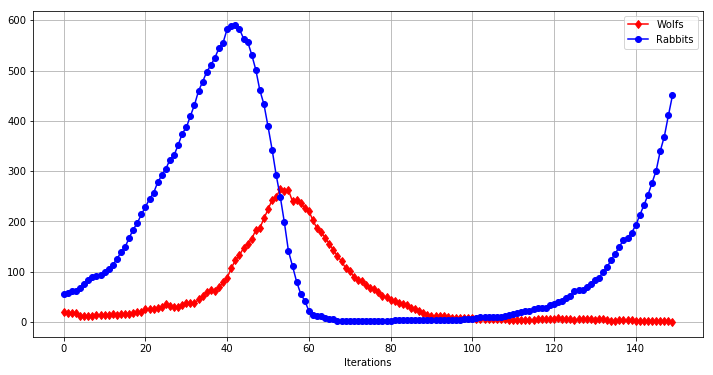

In [11]:
# Show stats
plotStats(np.array(stats))

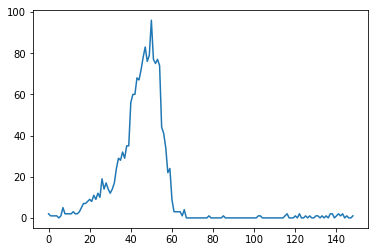

In [12]:
plt.plot(deads)
plt.show()

## Funcion muerte de conejos

In [79]:
NL_set = np.arange(18, 28)#(10, 30)
NH_set = np.arange(53, 57)#(40, 60)

pops = []
stats = []
hds = []

In [80]:
for e in itr.product(NL_set, NH_set):
    pop, st, deads = simulation(N, e[0], e[1], Prc, Pdl, Prl, Pcl, d, N_iter)
    pops.append(pop)
    stats.append(st)
    hds.append(deads)

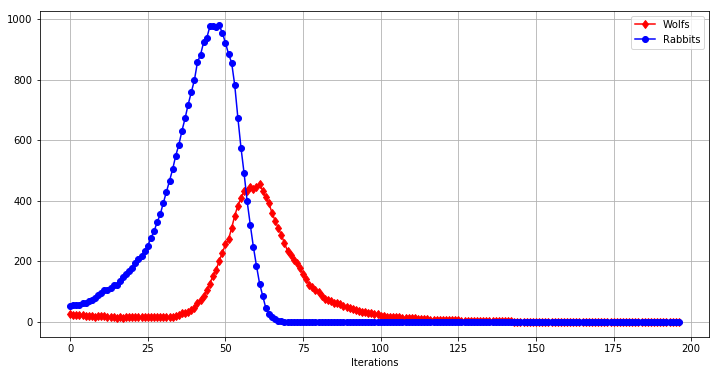

In [122]:
plotStats(np.array(stats[33]))

In [81]:
def createTriple(stats, hds):
    N = len(stats)
    
    Z = []
    XY = []
    
    
    for i in range(N):
        S = stats[i]
        D = hds[i]
        M = len(D)
        for j in range(M):
            xy = [S[j+1][0], S[j+1][1]] 
            
            if xy not in XY:
                XY.append(xy)
                Z.append([D[j]])
            else:
                k = XY.index(xy)
                Z[k].append(D[j])
    
    data = np.zeros((len(Z), 3))    
    
    for t in range(len(Z)):

        data[t, 0] = XY[t][0]
        data[t, 1] = XY[t][1]
        data[t, 2] = float(np.array(Z[t]).mean())

    return data#np.array(data)#Z#np.array(Z)

In [82]:
Z = createTriple(stats, hds)

In [112]:
#np.save('data/data.npy', Z)

In [70]:
Z = np.load('data/data.npy')

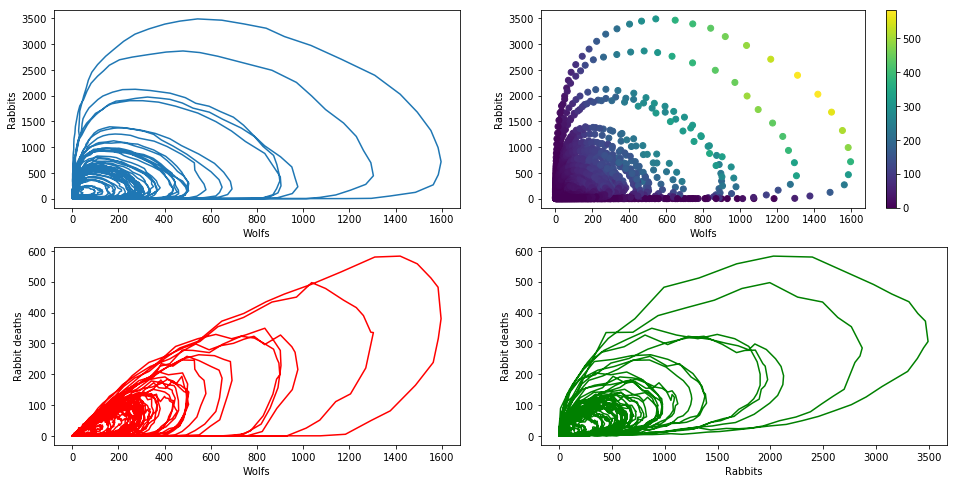

In [71]:
plotZ(Z)

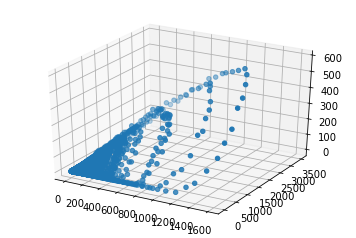

In [11]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(Z[:,0], Z[:,1], Z[:,2])
plt.show()

In [84]:
def plotInterpolation(Z, f):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    x = np.linspace(np.min(Z[:,0]), np.max(Z[:,0]), 100)
    y = np.linspace(np.min(Z[:,1]), np.max(Z[:,1]), 100)
    X, Y = np.meshgrid(x, y)
    ax.plot_surface(X, Y, f(X, Y))
    plt.show()

In [24]:
f = interpolate.interp2d(Z[:,0], Z[:,1], Z[:, 2], kind='cubic')

/home/dsanmartin/anaconda3/lib/python3.6/site-packages/scipy/interpolate/_fitpack_impl.py:975: RuntimeWarning: A theoretically impossible result when finding a smoothing spline
with fp = s. Probable causes: s too small or badly chosen eps.
(abs(fp-s)/s>0.001)
	kx,ky=3,3 nx,ny=27,31 m=4134 fp=38734.354403 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


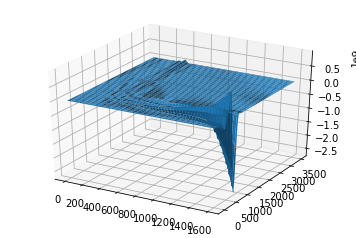

In [26]:
plotInterpolation(Z, f)

In [72]:
rbfi = interpolate.Rbf(Z[:,0], Z[:,1], Z[:,2], epsilon=.5)  # radial basis function interpolator instance

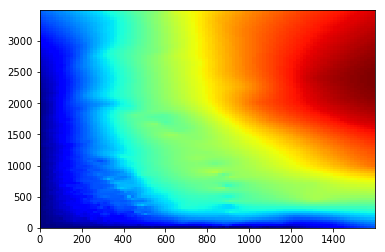

In [73]:
xi = np.linspace(np.min(Z[:,0]), np.max(Z[:,0]), 100)
yi = np.linspace(np.min(Z[:,1]), np.max(Z[:,1]), 100)
X, Y = np.meshgrid(xi, yi)
ZI = rbfi(X, Y)   # interpolated values
plt.pcolor(X, Y, ZI, cmap=cm.jet)
plt.show()

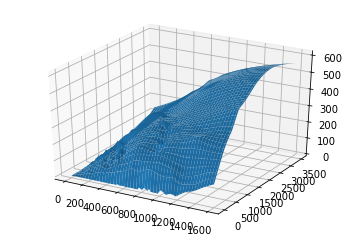

In [74]:
fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(xi, yi)
ax.plot_surface(X, Y, ZI)
plt.show()

In [89]:
from scipy.interpolate import griddata
grid_x, grid_y = np.mgrid[np.min(Z[:,0]):np.max(Z[:,0]):100j, np.min(Z[:,1]):np.max(Z[:,1]):100j]
grid_z0 = griddata(Z[:,0:2], Z[:, 2], (grid_x, grid_y), method='linear')

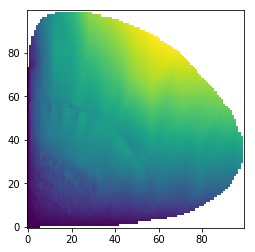

In [90]:
plt.imshow(grid_z0, origin='lower')
plt.show()

In [82]:
from scipy.interpolate import LinearNDInterpolator, NearestNDInterpolator, SmoothBivariateSpline
LI = LinearNDInterpolator(Z[:,0:2], Z[:, 2])
NI = NearestNDInterpolator(Z[:,0:2], Z[:, 2])

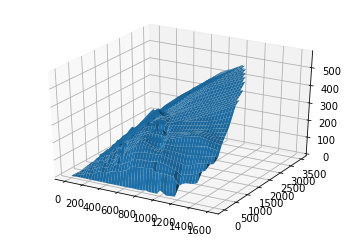

In [87]:
fig = plt.figure()
ax = fig.gca(projection='3d')
x = np.linspace(np.min(Z[:,0]), np.max(Z[:,0]))
y = np.linspace(np.min(Z[:,1]), np.max(Z[:,1]))
X, Y = np.meshgrid(x, y)
F = LI(X, Y)
#ax.scatter(Z[:,0], Z[:,1], Z[:,2])
ax.plot_surface(X, Y, F)
plt.show()

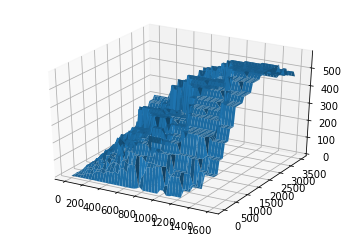

In [88]:
fig = plt.figure()
ax = fig.gca(projection='3d')
x = np.linspace(np.min(Z[:,0]), np.max(Z[:,0]))
y = np.linspace(np.min(Z[:,1]), np.max(Z[:,1]))
X, Y = np.meshgrid(x, y)
F = NI(X, Y)
#ax.scatter(Z[:,0], Z[:,1], Z[:,2])
ax.plot_surface(X, Y, F)
plt.show()

## Discrete Model

In [295]:
def plot2Pop(i, H, L):
    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.imshow(L[i])
    plt.title("Wolfs")
    plt.subplot(1, 2, 2)
    #sc = plt.scatter(Z[:,0], Z[:,1], c=Z[:, 2])
    #plt.colorbar(sc)
    plt.imshow(H[i])
    plt.title("Rabbits")
    plt.show()

In [296]:
def plotPopTime(i=0):
    slider = widgets.IntSlider(value=0, min=0, max=len(L)-1, step=1, description='Time step:', 
                               continuous_update=False, readout=True, readout_format='d')
    
    widgets.interact(plot2Pop, H=widgets.fixed(H), L=widgets.fixed(L), i=slider)
    #widgets.interact(plotStats, i=slider)

In [334]:
def simulation2(N, N_iter, Prc, Pdl, Prl, F):
    
    L = np.zeros((N_iter + 1, N, N))
    H = np.zeros((N_iter + 1, N, N))
    
        # Random wolfs and rabbits populations
    L[0] = np.random.randint(0, 100, size=(N, N))
    H[0] = np.random.randint(0, 100, size=(N, N))
    
    stats = [[NL, NH]]
    
    for k in range(1, N_iter + 1):
        for i in range(N):
            for j in range(N):
                H[k, i, j] = H[k-1, i, j] * (1 + Prc) - F(L[k-1, i, j], H[k-1, i, j]) * 1e-14
                L[k, i, j] = L[k-1, i, j] * (1 +  F(L[k-1, i, j], H[k-1, i, j]))*Prl - L[k-1, i, j]*Pdl
        

        stats.append([L[k].sum(), H[k].sum()])
        
            
    return L, H, np.array(stats)

In [347]:
L, H, stats2 = simulation2(40, 10, Prc, Pdl, Prl, NI)

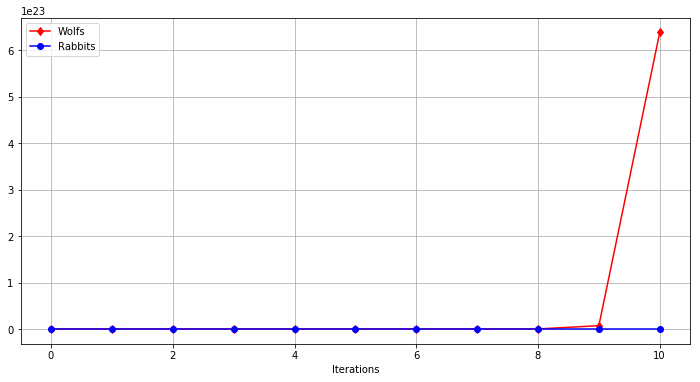

In [348]:
plotStats(stats2)

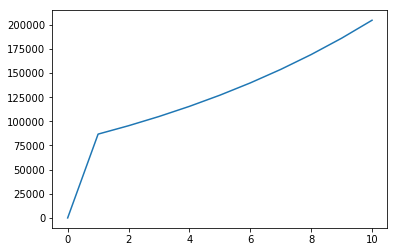

In [350]:
plt.plot(stats2[:,1])
plt.show()

In [316]:
plotPopTime()

interactive(children=(IntSlider(value=0, continuous_update=False, description='Time step:', max=50), Output()), _dom_classes=('widget-interact',))

## Continuous

In [42]:
def plotLH2(i, H, L):
    plt.figure(figsize=(10, 8))
    plt.subplot(1, 2, 1)
    Hp = plt.imshow(H[i])
    plt.colorbar(Hp, fraction=0.046, pad=0.04)
    plt.title("Hares")
    plt.subplot(1, 2, 2)    
    Lp = plt.imshow(L[i])
    plt.colorbar(Lp, fraction=0.046, pad=0.04)
    plt.title("Lynxes")
    plt.tight_layout()
    plt.show()

In [72]:
def plotPopLH2(rhos, gammas):
    pR = np.zeros(T)
    pG = np.zeros(T)

    for j in range(T):
        pR[j] = np.sum(rhos[j])
        pG[j] = np.sum(gammas[j])

    plt.plot(t, pR)
    plt.plot(t, pG)
    plt.show()

In [43]:
# Laplacian with periodic boundary condition
def laplacian(f):
    return np.roll(f, 1, axis=0) + np.roll(f, -1, axis=0) + np.roll(f, -1, axis=1) + np.roll(f, 1, axis=1) - 4*f

In [66]:
def f(rho, gamma):
    return (rho * gamma) / (rho + gamma)

In [67]:
def F(rho, gamma, f, c, m, hr, hs, lr, ld, h):
    lrho = (1/h) ** 2 * laplacian(rho)
    lgamma = (1/h) ** 2 * laplacian(gamma)
  
    f1 = rho * (hr - f(rho, gamma) * hs) + (m/8) * lrho
    f2 = gamma * (f(rho, gamma) * hs * lr - ld) + (m/8) * lgamma
  
    return (1/c) * f1,  (1/c) * f2

In [68]:
def euler(rho0, gamma0, dt, T, parameteres):
    c = parameteres['c']
    m = parameteres['m']
    hr = parameteres['hr']
    hs = parameteres['hs']
    lr = parameteres['lr']
    ld = parameteres['ld']
    h = parameteres['h']
  
    rho_sol = np.zeros((T, rho0.shape[0], rho0.shape[1]))
    gamma_sol = np.zeros((T, gamma0.shape[0], gamma0.shape[1]))
    rho_sol[0], gamma_sol[0] = rho0, gamma0
  
    for t in range(1, T):
        new_rho, new_gamma = F(rho_sol[t-1], gamma_sol[t-1], f, c, m, hr, hs, lr, ld, h)
        rho_sol[t] = rho_sol[t-1] + new_rho * dt
        gamma_sol[t] = gamma_sol[t-1] + new_gamma * dt

    return rho_sol, gamma_sol

In [84]:
# Parameters
Tmax = 10
N = 100
T = 2000
x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, N)
t = np.linspace(0, Tmax, T)
h = x[1] - x[0]
dt = t[1] - t[0]

parameters = {
  'c': dt/h**2,
  'm': .4,
  'hr': 5e-1,
  'hs': 5e-1,
  'lr': 1e-1,
  'ld': 1e-1,
  'h': h    
}

X, Y = np.meshgrid(x, y)

# Initial conditions
#R = lambda x, y: (np.sin(x) * np.cos(x - y)) ** 2
#G = lambda x, y: (np.sin(y + x) * np.cos(x)) ** 2
rho0 = R(X, Y)
gamma0 = G(X, Y)

rho0 = np.random.rand(N, N)
gamma0 = np.random.rand(N, N)

# Solve with Euler method
rhos, gammas = euler(rho0, gamma0, dt, T, parameters)

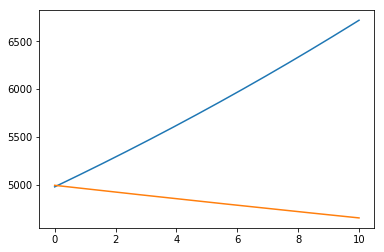

In [85]:
plotPopLH2(rhos, gammas)

In [70]:
widgets.interact(plotLH2, i=widgets.IntSlider(min=0, max=len(rhos)-1, 
    continuous_update=False), L=widgets.fixed(rhos), H=widgets.fixed(gammas))

/anaconda3/lib/python3.6/site-packages/traitlets/traitlets.py:567: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  silent = bool(old_value == new_value)


interactive(children=(IntSlider(value=0, continuous_update=False, description='i', max=199), Output()), _dom_classes=('widget-interact',))

<function __main__.plotLH2>